<h1 align="center"> CSEN 1022 Assignment Submission </h1> 

## Please don't forget to fill in this data
Member 1 Name: Andrew Ayman ALfy

Member 1 ID: 40-9874

Member 1 Tutorial: T-07

Member 2 Name: Youssef Abobakr

Member 2 ID: 40-14040

Member 2 Tutorial: T-05

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [2]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
# Use Assignment 0 for reference.
# Read Training Images, Testing Images, Training Labels, Testing Labels
train = np.array([plt.imread('Data/Train/'+str(i)+'.jpg').reshape(-1)for i in range(1, 2401)])
test = np.array([plt.imread('Data/Test/'+str(i)+'.jpg').reshape(-1)for i in range(1, 201)])
train_labels = np.loadtxt('Data/Train/Training Labels.txt')
test_labels = np.loadtxt('Data/Test/Test Labels.txt')
print(train.shape, test.shape)
print(train_labels.shape, test_labels.shape)

(2400, 784) (200, 784)
(2400,) (200,)


## Compute weight vectors

### Divide data set into classes

In [3]:
image_size = np.array(train.shape[1])
counter = 0

class0 = train[:240]
class0 = np.array(class0)

class1 = train[240:480]
class1 = np.array(class1)

class2 = train[480:720]
class2 = np.array(class2)

class3 = train[720:960]
class3 = np.array(class3)

class4 = train[960:1200]
class4 = np.array(class4)

class5 = train[1200:1440]
class5 = np.array(class5)

class6 = train[1440:1680]
class6 = np.array(class6)

class7 = train[1680:1920]
class7 = np.array(class7)

class8 = train[1920:2160]
class8 = np.array(class8)

class9 = train[2160:2400]
class9 = np.array(class9)

classes = [class0, class1,class2,class3,class4,class5,class6,class7,class8,class9]
classes = np.array(classes)

### Get Means

In [4]:
def mean(data):
    total_sum = 0
    mean_matrix = np.array([0]*784)
    for pixel in range(784):
        total_pixel_values = 0
        for image in range(int(data.size/784)):
            total_pixel_values += data[image][pixel]
        mean_of_pixels = total_pixel_values / (data.size/784)
        mean_matrix[pixel] = mean_of_pixels
        mean_matrix = np.array(mean_matrix)
    return mean_matrix

In [5]:
def get_mean_of_all_classes(data_set2):
    data_set=[0]*10
    for i in range(10):    
        data_set[i]= mean(data_set2[i])
    return np.array(data_set)
get_mean_of_all_classes(classes)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
def mean_of_other_classes(excluded, averaged_data_set):
    mean_value = 0
    mean_matrix = np.array([0]*784)
    for pixel in range (784):
        pixel_value = 0
        for i in range(10):
            if i != excluded:
                pixel_value += averaged_data_set[i][pixel]
        mean_value = pixel_value / 9
        mean_matrix[pixel] = mean_value
    return np.array(mean_matrix)
mean_of_other_classes(0, get_mean_of_all_classes(classes))

array([  0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
         2,   2,   2,   3,   4,   4,   5,   7,   7,   6,   5,   4,   3,
         2,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   3,   4,   5,   6,   8,  10,  13,  16,  18,  17,  14,  11,
         7,   5,   3,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   5,   8,  12,  18,  24,  32,  40,  45,  46,  42,
        35,  27,  19,  12,   7,   4,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   2,   5,  11,  18,  27,  40,  52,  65,  79,  86,
        87,  80,  68,  54,  39,  25,  16,  10,   3,   0,   0,   0,   0,
         0,   0,   0,   1,   2,   6,  11,  21,  33,  48,  65,  8

In [7]:
def getVariance(classx, x):
    total_outcome = np.zeros((784, 784))
    #print(total_outcome)
    mean_of_x = mean(classx)
    for i in range(240):
        minus_mean = np.array(classx[i] - mean_of_x).reshape(784,1)
        minus_mean_t = np.array(minus_mean.T)
        #print(minus_mean_t)

        total_outcome += np.dot(minus_mean,minus_mean_t)
    excluded_means =  mean_of_other_classes(x, get_mean_of_all_classes(classes))
    print(total_outcome.shape)

    
    for i in range(10):
        if(i!=x):
            for y in range(240):
                minus_mean = np.array(classes[i][y] - excluded_means).reshape(784,1)
                minus_mean_t = minus_mean.T
                #print(minus_mean.shape)
                #print(minus_mean_t.shape)
                total_outcome += np.dot(minus_mean,minus_mean_t)
    return total_outcome
    #print(total_outcome)

In [8]:
def get_sw_inverse(classindex,x):
    return np.linalg.pinv(getVariance(classindex,x))
get_sw_inverse(class0, 0)

(784, 784)


array([[ 1.16384074e-03,  1.92477383e-04,  1.21527188e-04, ...,
         5.63147703e-06,  9.38579505e-06,  2.77707165e-06],
       [ 1.92477383e-04,  8.34413968e-04, -1.97938554e-05, ...,
        -5.96385861e-06, -9.93976435e-06,  9.20434307e-06],
       [ 1.21527188e-04, -1.97938555e-05,  1.10065430e-03, ...,
         3.62428619e-05,  6.04047698e-05,  1.94263235e-05],
       ...,
       [ 5.63147703e-06, -5.96385861e-06,  3.62428619e-05, ...,
         3.08834856e-05,  5.14724760e-05,  2.62674303e-05],
       [ 9.38579505e-06, -9.93976435e-06,  6.04047698e-05, ...,
         5.14724760e-05,  8.57874600e-05,  4.37790505e-05],
       [ 2.77707164e-06,  9.20434307e-06,  1.94263235e-05, ...,
         2.62674303e-05,  4.37790505e-05,  8.31343620e-05]])

In [9]:
weight_vectors = np.zeros((10, 784))
def get_weight_vectors_for_all_classes():
    for i in range(10):
        weight_vectors[i] = np.dot(get_sw_inverse(classes[i], i),  (mean_of_other_classes(i, get_mean_of_all_classes(classes)) - mean(classes[i])))
    return weight_vectors


weight_vectors = get_weight_vectors_for_all_classes()



(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)
(784, 784)


In [10]:
print(weight_vectors.shape)

(10, 784)


## Compute confusion matrix

In [110]:
# Please return a variable named confusion_matrix so the next cell would work.
confusion_matrix = np.zeros((10,10))

test0 = np.array(test[:20])
test1 = np.array(test[20:40])
test2 = np.array(test[40:60])
test3 = np.array(test[60:80])
test4 = np.array(test[80:100])
test5 = np.array(test[100:120])
test6 = np.array(test[120:140])
test7 = np.array(test[140:160])
test8 = np.array(test[160:180])
test9 = np.array(test[180:200])

tests = [test0, test1,test2,test3,test4,test5,test6,test7,test8,test9]
tests = np.array(tests)
results = np.zeros((10,20))
for i in range(10):
    for image in range(20):
        results[i] =  test_class(tests[i], weight_vectors)

print(results)
confusion_matrix = np.zeros((10,10))
for class_number in range(10):
    for image in range(20):
        confusion_matrix[class_number][int(results[class_number][image])]+=1
print(confusion_matrix)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 8. 2. 1. 2. 2. 0. 4. 3. 2. 0. 2. 0. 3. 2. 2. 4. 2. 2. 2.]
 [2. 8. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 8. 8.]
 [8. 9. 4. 0. 4. 4. 4. 6. 2. 5. 4. 4. 8. 9. 4. 6. 3. 8. 4. 4.]
 [8. 5. 8. 3. 8. 5. 5. 5. 9. 5. 3. 8. 6. 5. 8. 3. 9. 3. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7. 7. 7. 7. 9. 7. 7. 2. 7. 8. 7. 7. 7. 7. 3.]
 [8. 8. 8. 9. 5. 8. 8. 8. 8. 8. 8. 8. 8. 3. 8. 2. 8. 8. 8. 8.]
 [9. 7. 9. 7. 7. 4. 3. 5. 9. 9. 4. 9. 9. 9. 7. 2. 7. 0. 9. 9.]]
[[19.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. 20.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  1. 11.  2.  2.  0.  0.  0.  1.  0.]
 [ 0.  0.  1. 16.  0.  0.  0.  0.  3.  0.]
 [ 1.  0.  1.  1.  9.  1.  2.  0.  3.  2.]
 [ 0.  0.  0.  4.  0.  8.  1.  0.  5.  2.]
 [ 0.  0.  0.  0.  0.  0. 20.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0. 16.  1.  1.]
 [ 0.  0.  1.  1.  0.  1.

In [111]:
def test_class(testX, weights):
    image_calc= np.zeros((int(testX.size/784), 10))
    values = np.zeros(10)
    image_classification = np.zeros(int(testX.size/784))
    for i in range(int(testX.size/784)):
        for y in range(10):
            weight_vector_transpose = weights[y].T
            calc = np.dot(testX[i], weight_vector_transpose)
            values[y] = calc
            image_calc[i][y] = values[y]
        image_classification[i] = values.argmin(axis = 0)
    return image_classification
print(test_class(test6, weight_vectors))

[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]


In [160]:
# https://stackoverflow.com/questions/16720682/pil-cannot-write-mode-f-to-jpeg
from PIL import Image  
new_p = Image.fromarray(confusion_matrix)
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
new_p.save('Confusion_NoBias.jpg')

## Plot confusion matrix and print accuracy (Don't edit)

Overall accuracy:  0.72


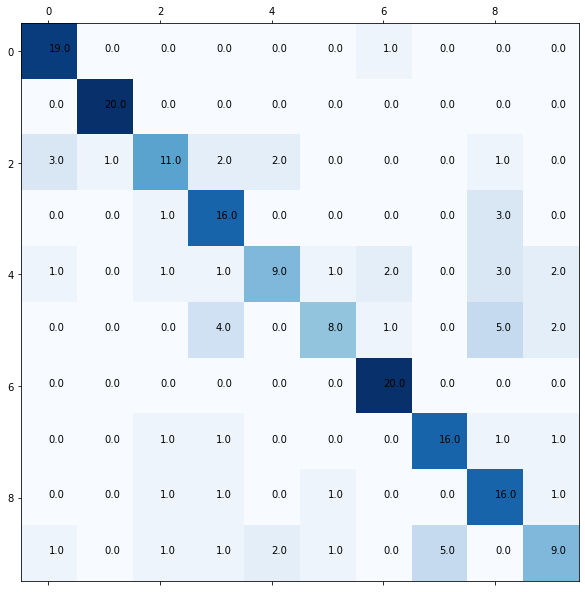

In [112]:
# PLEASE DON'T EDIT THIS CELL

# Plot Confusion Matrix
plt.rc('figure', figsize=[20,10])
plt.matshow(confusion_matrix,cmap='Blues')
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

# Calculate Accuracy
print("Overall accuracy: ",(np.sum(np.diag(confusion_matrix)))/test.shape[0])

## Compute bias node for each classifier

In [146]:
# w0 = -wT (m1 + m2)/2
_wt0 = -1*weight_vectors[0].T
_wt1 = -1*weight_vectors[1].T
_wt2 = -1*weight_vectors[2].T
_wt3 = -1*weight_vectors[3].T
_wt4 = -1*weight_vectors[4].T
_wt5 = -1*weight_vectors[5].T
_wt6 = -1*weight_vectors[6].T
_wt7 = -1*weight_vectors[7].T
_wt8 = -1*weight_vectors[8].T
_wt9 = -1*weight_vectors[9].T

mean_of_all_classes = get_mean_of_all_classes(classes)
exclude0 = mean_of_other_classes(0, mean_of_all_classes)
exclude1 = mean_of_other_classes(1, mean_of_all_classes)
exclude2 = mean_of_other_classes(2, mean_of_all_classes)
exclude3 = mean_of_other_classes(3, mean_of_all_classes)
exclude4 = mean_of_other_classes(4, mean_of_all_classes)
exclude5 = mean_of_other_classes(5, mean_of_all_classes)
exclude6 = mean_of_other_classes(6, mean_of_all_classes)
exclude7 = mean_of_other_classes(7, mean_of_all_classes)
exclude8 = mean_of_other_classes(8, mean_of_all_classes)
exclude9 = mean_of_other_classes(9, mean_of_all_classes)


w0_0 = np.dot(_wt0, (mean_of_all_classes[0]+exclude0)/2)
w0_1 = np.dot(_wt1, (mean_of_all_classes[1]+exclude1)/2)
w0_2 = np.dot(_wt2, (mean_of_all_classes[2]+exclude2)/2)
w0_3 = np.dot(_wt3, (mean_of_all_classes[3]+exclude3)/2)
w0_4 = np.dot(_wt4, (mean_of_all_classes[4]+exclude4)/2)
w0_5 = np.dot(_wt5, (mean_of_all_classes[5]+exclude5)/2)
w0_6 = np.dot(_wt6, (mean_of_all_classes[6]+exclude6)/2)
w0_7 = np.dot(_wt7, (mean_of_all_classes[7]+exclude7)/2)
w0_8 = np.dot(_wt8, (mean_of_all_classes[8]+exclude8)/2)
w0_9 = np.dot(_wt9, (mean_of_all_classes[9]+exclude9)/2)

w0s = np.array([w0_0, w0_1, w0_2, w0_3,w0_4,w0_5,w0_6,w0_7,w0_8, w0_9])
print(w0s)

[0.00808728 0.00286153 0.00761052 0.00738421 0.00327357 0.00380711
 0.00864494 0.00723798 0.00777951 0.00468947]


In [151]:
def test_class_w0(testX, weights, w0):
    image_calc= np.zeros((int(testX.size/784), 10))
    values = np.zeros(10)
    image_classification = np.zeros(int(testX.size/784))
    for i in range(int(testX.size/784)):
        for y in range(10):
            weight_vector_transpose = weights[y].T
            calc = np.dot(testX[i], weight_vector_transpose) + w0[y]
            values[y] = calc
            image_calc[i][y] = values[y]
        image_classification[i] = values.argmin(axis = 0)
    return image_classification
print(test_class(test6, weight_vectors))

[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]


## Compute confusion matrix

In [152]:
# Please return a variable named confusion_matrix so the next cell would work.
confusion_matrix = np.zeros((10,10))
w0_results = np.zeros((10,20))
for i in range(10):
    for image in range(20):
        w0_results[i] =  test_class_w0(tests[i], weight_vectors, w0s)
        print(w0_results)

for class_number in range(10):
    for image in range(20):
        confusion_matrix[class_number][int(w0_results[class_number][image])]+=1
print(confusion_matrix)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 2. 1. 2. 2. 0. 4. 3. 2. 0. 2. 1. 3. 2. 2. 4. 2. 2. 2.]
 [1. 3. 3. 3. 5. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 8. 8.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 2. 1. 2. 2. 0. 4. 3. 2. 0. 2. 1. 3. 2. 2. 4. 2. 2. 2.]
 [1. 3. 3. 3. 5. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 8. 8.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 2. 1. 2. 2. 0. 4. 3. 2. 0. 2. 1. 3. 2. 2. 4. 2. 2. 2.]
 [1. 3. 3. 3. 5. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 8. 8.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 8. 9. 4. 4. 4. 4. 4. 4.]
 [8. 5. 5. 3. 5. 5. 5. 5. 9. 5. 9. 8. 6. 5. 5. 5. 9. 5. 5. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 2. 1. 2. 2. 0. 4. 3. 2. 0. 2. 1. 3. 2. 2. 4. 2. 2. 2.]
 [1. 3. 3. 3. 5. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 8. 8.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 8. 9. 4. 4. 4. 

 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 2. 1. 2. 2. 0. 4. 3. 2. 0. 2. 1. 3. 2. 2. 4. 2. 2. 2.]
 [1. 3. 3. 3. 5. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 8. 8.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 8. 9. 4. 4. 4. 4. 4. 4.]
 [8. 5. 5. 3. 5. 5. 5. 5. 9. 5. 9. 8. 6. 5. 5. 5. 9. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7. 7. 7. 7. 9. 7. 7. 2. 7. 9. 7. 7. 7. 7. 3.]
 [8. 5. 8. 9. 5. 8. 8. 8. 8. 8. 8. 8. 8. 3. 8. 2. 8. 8. 8. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 2. 1. 2. 2. 0. 4. 3. 2. 0. 2. 1. 3. 2. 2. 4. 2. 2. 2.]
 [1. 3. 3. 3. 5. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 8. 8.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 8. 9. 4. 4. 4. 

In [168]:
# https://stackoverflow.com/questions/16720682/pil-cannot-write-mode-f-to-jpeg
new_p = Image.fromarray(confusion_matrix)
if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
new_p.save('Confusion_WithBias.jpg')

## Plot confusion matrix and print accuracy (Don't edit)

Overall accuracy:  0.775


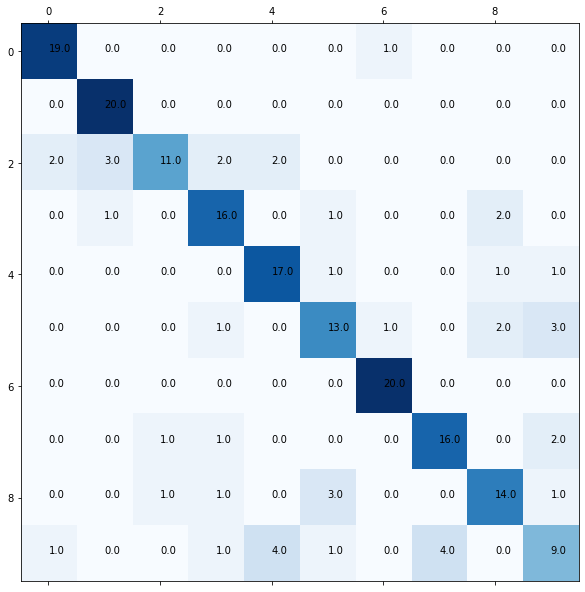

In [153]:
# PLEASE DON'T EDIT THIS CELL

# Plot Confusion Matrix
plt.rc('figure', figsize=[20,10])
plt.matshow(confusion_matrix,cmap='Blues')
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))
        
# Calculate Accuracy
print("Overall accuracy: ",(np.sum(np.diag(confusion_matrix)))/test.shape[0])